# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

approx 15.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

p_elixir = .15
n_box = 100

elixir_dist = stats.binom(n_box, p_elixir)
elixir_prob = list(range(1,n_box+1))

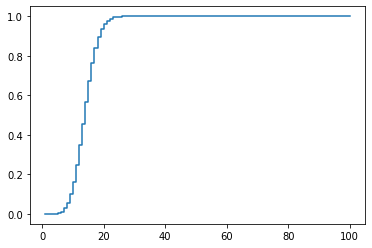

In [2]:
outcomes = []
p_elixir = 0.15
n_boxes = 100
loot_dist = stats.binom(n_boxes, p_elixir)
loot_dist.pmf(15)
plt.step(elixir_prob, elixir_dist.cdf(elixir_prob))


#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

most likely one would have to acquire 7

In [3]:
# Calculate the number of boxes that a user is required to procure to ensure a 99% chance of acquiring an elixir
box_buy = 0 # Start from buying 0 boxes
prob_threshold = .99 # set the threshold to be 99%
while elixir_dist.cdf(box_buy) <= prob_threshold:
    box_buy += 1
print(f'It is very unlikely for a user to buy {box_buy} boxes and not get an elixir.')

It is very unlikely for a user to buy 24 boxes and not get an elixir.


#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

X is a discrete random variable because it is countable and getting an elixir does not increase or decrease the user's chance of getting another (independence)

In [4]:
chance_of_get_20_more = 1 - loot_dist.cdf(20)
print(f'If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is {chance_of_get_20_more}')

If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is 0.06631976581888166


#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

X, being a discrete random variable, due to being countable, furthermore acquring an elixir does not increase or decrease the user's chance (independence)

In [5]:
chance_of_get_20_more = 1 - elixir_dist.cdf(20)
print(f'If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is {chance_of_get_20_more}')

If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is 0.06631976581888166


#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

X is binomial distribution: 
1. The probablity for an box to contain an elixir is known =(success rate): 15%
2. The number of boxes to purchase is known = (number of trials): 100
3. The chance behind acquiring one elixir does not affect the next elixir's chance of appearing.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [6]:
## If a user earns 100 loot boxes, the chance that a user gets 20 elixirs is 4.0%.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [7]:
p_elixir = .15
n_boxes = 100
elixir_stats = stats.binom(n_boxes, p_elixir)

chance_of_get_20_more = 1 - sum(elixir_stats.pmf(i) for i in range(0, 21))
print(f'If a user earns 100 loot boxes, the chance to acquire 20 elixirs would be {chance_of_get_20_more}')

If a user earns 100 loot boxes, the chance to acquire 20 elixirs would be 0.06631976581888699


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [8]:
# Show your work; leave your answer in a comment.
chance_of_get_20_more = 1 - elixir_stats.cdf(20)
print(f'If a user earns 100 loot boxes, the chance a user acquires more than 20 elixirs would be {chance_of_get_20_more}')

If a user earns 100 loot boxes, the chance a user acquires more than 20 elixirs would be 0.06631976581888166


In [9]:
# If a user earns 100 loot boxes, the chance the user acquires 20 elixirs would be 6.6%.

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [10]:
# If there are 100 users who procure 100 loot boxes, between 6 or 7 users would acquire >20 elixirs.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

discrete binomial
distribution; we have the ability of giving a variant between success or failure. 

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [11]:
# Show your work; leave your answer in a comment.
#186000 users
rev_target = 500_000
price_box = 1
box_per_user = 2.7
rev_per_user = price_box * box_per_user
n_user_exact = 500_000 / 2.7
n_user_exact

185185.18518518517

In [12]:
# round up to nearest thousand
n_user_round = round((n_user_exact + 500), -3) 
print(f'At least {round(n_user_round)} users would need to be on your platform for revenue to be at least $500_000')

At least 186000 users would need to be on your platform for revenue to be at least $500_000


In [ ]:
# >186,000 users would be requried upon the platformfor revenue to incrase towards  >$500_000.

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [13]:
# Show your work; leave your answer in a comment.
# Calculate the probability of a user who buys 0 to 20 boxes during the game last month
purchase_stats = stats.poisson(rev_per_user)
n_box = list(range(0,20))
purchase_prob = np.array([purchase_stats.pmf(box) for box in n_box])
purchase_prob

array([6.72055127e-02, 1.81454884e-01, 2.44964094e-01, 2.20467685e-01,
       1.48815687e-01, 8.03604710e-02, 3.61622120e-02, 1.39482818e-02,
       4.70754509e-03, 1.41226353e-03, 3.81311152e-04, 9.35945556e-05,
       2.10587750e-05, 4.37374558e-06, 8.43508076e-07, 1.51831454e-07,
       2.56215578e-08, 4.06930624e-09, 6.10395936e-10, 8.67404751e-11])

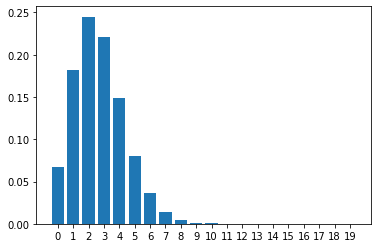

In [14]:
# Plot the probability of a user who buys 0 to 20 boxes during the game last month
plt.bar(n_box, purchase_stats.pmf(n_box))
plt.xticks(n_box);

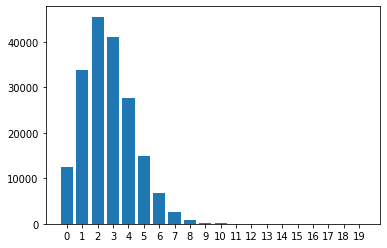

In [15]:
# Plot the number of users who bought 0 to 20 boxes during the game last month
n_buyer = purchase_prob * n_user_round
plt.bar(n_box, n_buyer)
plt.xticks(n_box);

In [16]:
# Calculating the revenue from users who bought 0 to 20 boxes during the game last month
rev_stats = np.array(n_box * price_box) * np.array(n_buyer)
rev_stats

array([0.00000000e+00, 3.37506085e+04, 9.11266429e+04, 1.23020968e+05,
       1.10718871e+05, 7.47352380e+04, 4.03570285e+04, 1.81606628e+04,
       7.00482710e+03, 2.36412915e+03, 7.09238744e+02, 1.91494461e+02,
       4.70031858e+01, 1.05757168e+01, 2.19649503e+00, 4.23609756e-01,
       7.62497560e-02, 1.28671463e-02, 2.04360559e-03, 3.06540839e-04])

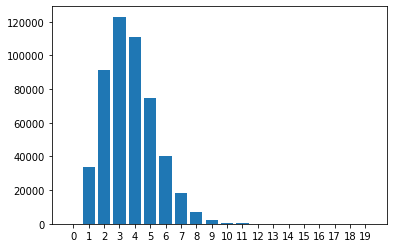

In [17]:
plt.bar(n_box, rev_stats)
plt.xticks(n_box);

In [18]:
# Calculate the revenue from high value user (user with minimum purchase of 5 box) last month
hvu_min_purchase = 5
hvu_rev = sum(rev_stats[hvu_min_purchase:])
print(f'The revenue from High Value User is {round(hvu_rev)}')

The revenue from High Value User is 143583.0


In [19]:
# Calculate the revenue from low value user (user with minimum purchase of 5 box) last month
lvu_rev = sum(rev_stats[:hvu_min_purchase])
print(f'The revenue from Low Value User is {round(lvu_rev)}')

The revenue from Low Value User is 358617.0


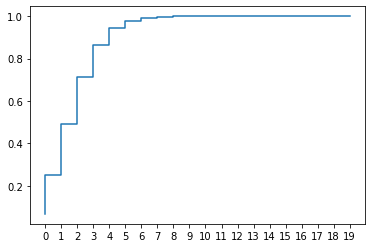

In [20]:
# Alternatively calculating the HVU and LVU using cmf and total revenue of $500,000 as previously stated.
cum_purchase_prob = np.array([purchase_stats.cdf(box) for box in n_box])
plt.step(n_box, purchase_stats.cdf(n_box))
plt.xticks(n_box);

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

1. mean: on average, procurment between 2.7 boxes each
2. median: half purchased 3 or more loot boxes
3. mode: users who purchased 3 boxes have the largest population, about 12000.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [23]:
import numpy as np

In [24]:
# Experiment on how many boxes a user has to open to obtain the first elixir
# input: integer - number of trials
# output: list of the number of attempts for each trial
def experiment(n):
    trials = []
    for _ in range(n):
        n_trial = 0
        n_box_open = 0
        while n_box_open <= 85:
            n_box_open = np.random.randint(1,101)
            n_trial += 1
        trials.append(n_trial)
    return trials

In [25]:
#boxes_before_elixir(100_000)
# Try 100,000 trials using the experiment function
trials = experiment(100000)
first_elixir = np.array(trials)

# Construct the the keys and values to store the percentile data
pctl_keys = [5, 25, 50, 75, 95]
pctl_values = [np.percentile(first_elixir, key) for key in pctl_keys]
pctl = dict(zip(pctl_keys, pctl_values))
print(pctl)

{5: 1.0, 25: 2.0, 50: 5.0, 75: 9.0, 95: 19.0}


In [26]:
#number_boxes
for key, value in pctl.items():
    print(f'{key}th percentile: open {value} boxes before getting 1st elixir')

5th percentile: open 1.0 boxes before getting 1st elixir
25th percentile: open 2.0 boxes before getting 1st elixir
50th percentile: open 5.0 boxes before getting 1st elixir
75th percentile: open 9.0 boxes before getting 1st elixir
95th percentile: open 19.0 boxes before getting 1st elixir


In [27]:
type(trials)

list

In [28]:
print(np.percentile(number_boxes, 5))
print(np.percentile(number_boxes, 25))
print(np.percentile(number_boxes, 50))
print(np.percentile(number_boxes, 75))
print(np.percentile(number_boxes, 95))

NameError: name 'number_boxes' is not defined

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Dictionary would be efficient to store this data since the data is categorical paired with a value (numerical).

In [ ]:
import numpy as np
from statistics import mean

In [ ]:
#kemal collaboration
loot_box = ['magical elixir', 'golden pendant', 'steel armor', 'bronze coin']
#each will contain number of loot boxes required to acquire each particular item.
magical_elixir_list = []
golden_pendant_list = []
steel_armor_list = []
bronze_coin_list = []

def find_magical_elixir(counter = 0, x =""):
    while x !="elixir":
        loot_box_open = np.random.choice(box, 1, p = [0.01, 0.09, 0.3, 0.6], replace = False)
        counter += 1
        if loot_lox_open[0] == "magical elixir":
            x = "elixir"
            elixir_list.append(counter)
            
def find_golden_pendant(counter = 0, x =""):
    while x !="golden pendant":
        loot_box_open = np.random.choice(box, 1, p = [0.01, 0.09, 0.3, 0.6], replace = False)
        counter += 1
        if loot_lox_open[0] == "golden pendant":
            x = "golden pendant"
            elixir_list.append(counter)
            
def find_steel_armor(counter = 0, x =""):
    while x !="steel armor":
        loot_box_open = np.random.choice(box, 1, p = [0.01, 0.09, 0.3, 0.6], replace = False)
        counter += 1
        if loot_lox_open[0] == "steel armor":
            x = "steel armor"
            elixir_list.append(counter)
            
def find_bronze_coin(counter = 0, x =""):
    while x !="bronze coin":
        loot_box_open = np.random.choice(box, 1, p = [0.01, 0.09, 0.3,0.6], replace = False)
        counter += 1
        if loot_lox_open[0] == "bronze coin":
            x = "bronze coin"
            elixir_list.append(counter)
            
#once each item is combined within a fuction, they can be executed a pletora of attempts.
def find_all_items(n):
    for q in range (1, n+1):
        find_magical_elixir()
        find_golden_pendant()
        find_steel_armor()
        find_bronze_coin()
    print(f"I require an average of {mean(magical_elixir_list)} boxes to be opened to locate an magical elixir.")
    print(f"I require an average of {mean(golden_pendant_list)} boxes to be opened to locate a golden pendant.")
    print(f"I require an average of {mean(steel_armor_list)} boxes to be opened to locate a steel armor.")
    print(f"I require an average of {mean(bronze_coin_list)} boxes to be opened to locate a bronze coin.")

In [ ]:
# i have, ceased here to inquire queries here to ensure i have this completed. 

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

1. The total revenue (increase or decrease).
2. The number of users (increase or decrease).
3. The average number of boxes each user buys (increase or decrease).
4. The distribution of revenue from high value users and low value users.
Item 1 measures the overall impact to the game income. Items 2-4 explains the variance (revenue increase due to additional new users or existing users spending funding)